## **Tugas Matdis**
Nama Kelompok : imupp

24083010001 - Madina Hedy A

24083010044 - Via Amanda

24083010048 - Alfani Nur Azizah

24083010057 - Maulida Aprilia P

In [22]:
# lengkapi, koreksi, tambahkan sendiri klaster pertemanannya
# gunakan warna edge yang berbeda untuk tiap jenis klaster pertemanan
# buat fungsi untuk membuat koneksi pertemanan secara iteratif untuk anggota klaster

# Analisis
# 1) cari 3 orang yang konektivitasnya paling banyak
# 2) cari pasangan-pasangan yang paling jauh koneksinya
# 3a) bridge person. nx.betweenness_centrality(G)
# 3b) cari bridge person dengan koneksi paling sedikit

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import random
from matplotlib.lines import Line2D
from collections import Counter
import pandas as pd
import seaborn as sns


G = nx.Graph()
# G.add_node(1)
# G.add_edge(1, 1)  # self-loop
# nx.draw(G, with_labels=True)

def draw_graph(graph):
    node_colors = nx.get_node_attributes(graph, "color").values()
    edge_colors = nx.get_edge_attributes(graph, "color").values()
    # plt.figure(figsize=(width/12,height/12))
    nx.draw(
        graph,
        # nodes' param
        with_labels=True,
        node_size= 20,
        node_color=node_colors,
        font_size=8,
        # edges' param
        edge_color=edge_colors,
    )

In [44]:
mahasiswa = [
"Madina", "Maria", "Adinda", "Aquina", "Alimun", "Hizkia", "Raveena",
"Ophyng", "Aisyah", "Febriani", "Amelia", "Via", "Fanny", "Naia",
"Alfani", "Diah", "Kenzy", "Angel", "Maulida", "Izzati", "Auliya",
"Carissa", "Diva", "Erik", "Maya", "Dany", "Gendis", "Wildan", "Esthi",
"Naufal", "Laudya", "Adrian", "Selvy", "Hafiyyan", "Indra", "Yuniar",
"Kiky", "Sofia", "Varid", "Gaitsa"]
G.add_nodes_from(mahasiswa)


Berdasarkan nama-nama mahasiswa diatas kami membagi beberapa klaster untuk dianalisis lebih lanjut.

Klasterisasinya adalah sebagai berikut:

In [45]:
sekos = ["Aisyah", "Naia"]

In [46]:
himasada = ["Dany", "Esthi", "Via", "Madina", "Alfani", "Maulida", "Febriani", "Angel"]

In [47]:
BEMfakultas = ["Hafiyyan", "Varid", "Carissa"]

In [48]:
warkopbening = ["Yuniar", "Wildan", "Dany", "Izzati"]

In [49]:
skincaredanmakeup = ["Hizkia", "Kiky", "Yuniar", "Raveena", "Sofia", "Amelia", "Naia", "Carissa"]

In [50]:
makanbareng = ["Via", "Alfani", "Maulida", "Madina", "Gendis", "Diah", "Aquina", "Maya"]

In [51]:
kupukupu = ["Maria", "Adinda", "Alimun", "Aisyah", "Amelia", "Naia", "Kenzy", "Erik", "Maya", "Wildan", "Naufal", "Laudya", "Adrian", "Selvy", "Indra", "Gaitsa"]

In [52]:
kurakura = ["Alfani", "Via", "Maulida", "Madina", "Gendis", "Raveena", "Ophyng", "Febriani", "Angel", "Auliya", "Carissa", "Dany", "Esthi", "Hafiyyan", "Yuniar", "Varid"]

In [53]:
danusan = ["Maria", "Auliya", "Ophyng", "Fanny", "Izzati", "Kiky", "Varid"]

In [54]:


# Gabungkan semua ke dictionary agar mudah di-loop
clusters = {
    "sekos": sekos,
    "himasada": himasada,
    "BEMfakultas": BEMfakultas,
    "warkopbening": warkopbening,
    "skincaredanmakeup": skincaredanmakeup,
    "makanbareng": makanbareng,
    "kupukupu": kupukupu,
    "kurakura": kurakura,
    "danusan": danusan
}

# Buat graph kosong
G = nx.Graph()

# Warna edge berbeda untuk tiap klaster
colors = [
    "red", "blue", "green", "orange", "purple", "cyan",
    "magenta", "gold", "brown"
]
cluster_colors = dict(zip(clusters.keys(), colors))

# Tambahkan koneksi pertemanan dalam tiap klaster
for cluster_name, members in clusters.items():
    for a, b in itertools.combinations(members, 2):
        G.add_edge(a, b, group=cluster_name, color=cluster_colors[cluster_name])

# === ANALISIS ===

# 1) Tiga orang dengan konektivitas (degree) paling banyak
degree_dict = dict(G.degree())
top3_connectivity = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:3]
print("1) 3 Orang dengan konektivitas terbanyak:")
for name, deg in top3_connectivity:
    print(f"   {name}: {deg} koneksi")

# 2) Pasangan paling jauh koneksinya (path terpanjang)
#   -> cari pasangan dengan shortest path terbesar
lengths = dict(nx.all_pairs_shortest_path_length(G))
max_distance = 0
farthest_pairs = []
for a, paths in lengths.items():
    for b, dist in paths.items():
        if dist > max_distance:
            max_distance = dist
            farthest_pairs = [(a, b)]
        elif dist == max_distance:
            farthest_pairs.append((a, b))
print(f"\n2) Jarak koneksi terjauh: {max_distance} langkah")
print("   Pasangan-pasangan terjauh:")
for pair in farthest_pairs:
    print(f"   {pair[0]} ↔ {pair[1]}")

# 3a) Bridge person berdasarkan betweenness centrality
bet_centrality = nx.betweenness_centrality(G)
sorted_bc = sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True)
bridge_person = sorted_bc[0]
print(f"\n3a) Bridge person (penghubung antar klaster): {bridge_person[0]} (skor {bridge_person[1]:.4f})")

# 3b) Bridge person yang punya koneksi sedikit
low_degree_bridge = [(name, bc, degree_dict[name]) for name, bc in bet_centrality.items() if degree_dict[name] <= 5]
low_degree_bridge = sorted(low_degree_bridge, key=lambda x: x[1], reverse=True)
if low_degree_bridge:
    print("\n3b) Bridge person dengan koneksi sedikit:")
    for name, bc, deg in low_degree_bridge[:3]:
        print(f"   {name}: betweenness={bc:.4f}, degree={deg}")
else:
    print("\n3b) Tidak ada bridge person dengan koneksi ≤ 5.")


1) 3 Orang dengan konektivitas terbanyak:
   Yuniar: 22 koneksi
   Maya: 22 koneksi
   Naia: 21 koneksi

2) Jarak koneksi terjauh: 3 langkah
   Pasangan-pasangan terjauh:
   Aisyah ↔ Febriani
   Aisyah ↔ Angel
   Aisyah ↔ Esthi
   Aisyah ↔ Hafiyyan
   Esthi ↔ Adinda
   Esthi ↔ Alimun
   Esthi ↔ Aisyah
   Esthi ↔ Kenzy
   Esthi ↔ Erik
   Esthi ↔ Naufal
   Esthi ↔ Laudya
   Esthi ↔ Adrian
   Esthi ↔ Selvy
   Esthi ↔ Indra
   Esthi ↔ Gaitsa
   Febriani ↔ Adinda
   Febriani ↔ Alimun
   Febriani ↔ Aisyah
   Febriani ↔ Kenzy
   Febriani ↔ Erik
   Febriani ↔ Naufal
   Febriani ↔ Laudya
   Febriani ↔ Adrian
   Febriani ↔ Selvy
   Febriani ↔ Indra
   Febriani ↔ Gaitsa
   Angel ↔ Adinda
   Angel ↔ Alimun
   Angel ↔ Aisyah
   Angel ↔ Kenzy
   Angel ↔ Erik
   Angel ↔ Naufal
   Angel ↔ Laudya
   Angel ↔ Adrian
   Angel ↔ Selvy
   Angel ↔ Indra
   Angel ↔ Gaitsa
   Hafiyyan ↔ Adinda
   Hafiyyan ↔ Alimun
   Hafiyyan ↔ Aisyah
   Hafiyyan ↔ Kenzy
   Hafiyyan ↔ Erik
   Hafiyyan ↔ Naufal
   Hafiyyan ↔ La

Berdasarkan hasil analisis, diketahui bahwa Yuniar, Maya, dan Naia adalah tiga orang yang memiliki jumlah koneksi terbanyak, masing-masing memiliki 22, 22, dan 21 hubungan pertemanan. Hal ini menunjukkan bahwa ketiganya berperan penting dalam jaringan sosial dan menjadi pusat interaksi bagi banyak orang lainnya. Selanjutnya, jarak koneksi terjauh dalam jaringan adalah 3 langkah, artinya seseorang yang paling jauh tetap bisa terhubung melalui tiga orang perantara. Pasangan seperti Aisyah–Febriani, Angel–Adinda, dan lainnya yang tercantum dalam hasil menunjukkan bahwa mereka berada di posisi yang berbeda dalam struktur jaringan, yang menandakan adanya kelompok-kelompok yang tidak saling terhubung secara langsung.

Selain itu, Maya memiliki nilai betweenness centrality yang tertinggi (0,1495), yang berarti ia memainkan peran penting sebagai penghubung antar kelompok pertemanan.
Dengan kata lain, Maya menjadi jalur utama yang menghubungkan beberapa kelompok yang berbeda, sehingga keberadaannya sangat penting dalam menjaga keterpaduan jaringan sosial secara keseluruhan.

Tidak ada individu yang memiliki peran penghubung namun hanya memiliki sedikit koneksi (≤ 5), yang menunjukkan bahwa orang-orang yang berfungsi sebagai jembatan biasanya juga memiliki jumlah hubungan yang cukup banyak dalam jaringan.


In [55]:


# --- Data klaster ---
sekos = ["Aisyah", "Naia"]
himasada = ["Dany", "Esthi", "Via", "Madina", "Alfani", "Maulida", "Febriani", "Angel"]
BEMfakultas = ["Hafiyyan", "Varid", "Carissa"]
warkopbening = ["Yuniar", "Wildan", "Dany", "Izzati"]
skincaredanmakeup = ["Hizkia", "Kiky", "Yuniar", "Raveena", "Sofia", "Amelia", "Naia", "Carissa"]
makanbareng = ["Via", "Alfani", "Maulida", "Madina", "Gendis", "Diah", "Aquina", "Maya"]
kupukupu = ["Maria", "Adinda", "Alimun", "Aisyah", "Amelia", "Naia", "Kenzy", "Erik", "Maya",
             "Wildan", "Naufal", "Laudya", "Adrian", "Selvy", "Indra", "Gaitsa"]
kurakura = ["Alfani", "Via", "Maulida", "Madina", "Gendis", "Raveena", "Ophyng", "Febriani",
             "Angel", "Auliya", "Carissa", "Dany", "Esthi", "Hafiyyan", "Yuniar", "Varid"]
danusan = ["Maria", "Auliya", "Ophyng", "Fanny", "Izzati", "Kiky", "Varid"]

clusters = {
    "sekos": sekos,
    "himasada": himasada,
    "BEMfakultas": BEMfakultas,
    "warkopbening": warkopbening,
    "skincaredanmakeup": skincaredanmakeup,
    "makanbareng": makanbareng,
    "kupukupu": kupukupu,
    "kurakura": kurakura,
    "danusan": danusan,
}

cluster_colors = {
    "sekos": "#FFB3BA",
    "himasada": "#A7C7E7",
    "BEMfakultas": "#B5EAD7",
    "warkopbening": "#FFDAB9",
    "skincaredanmakeup": "#F7C6FF",
    "makanbareng": "#D5A6F6",
    "kupukupu": "#CBA0FF",
    "kurakura": "#99E2E2",
    "danusan": "#C0C0C0",
}


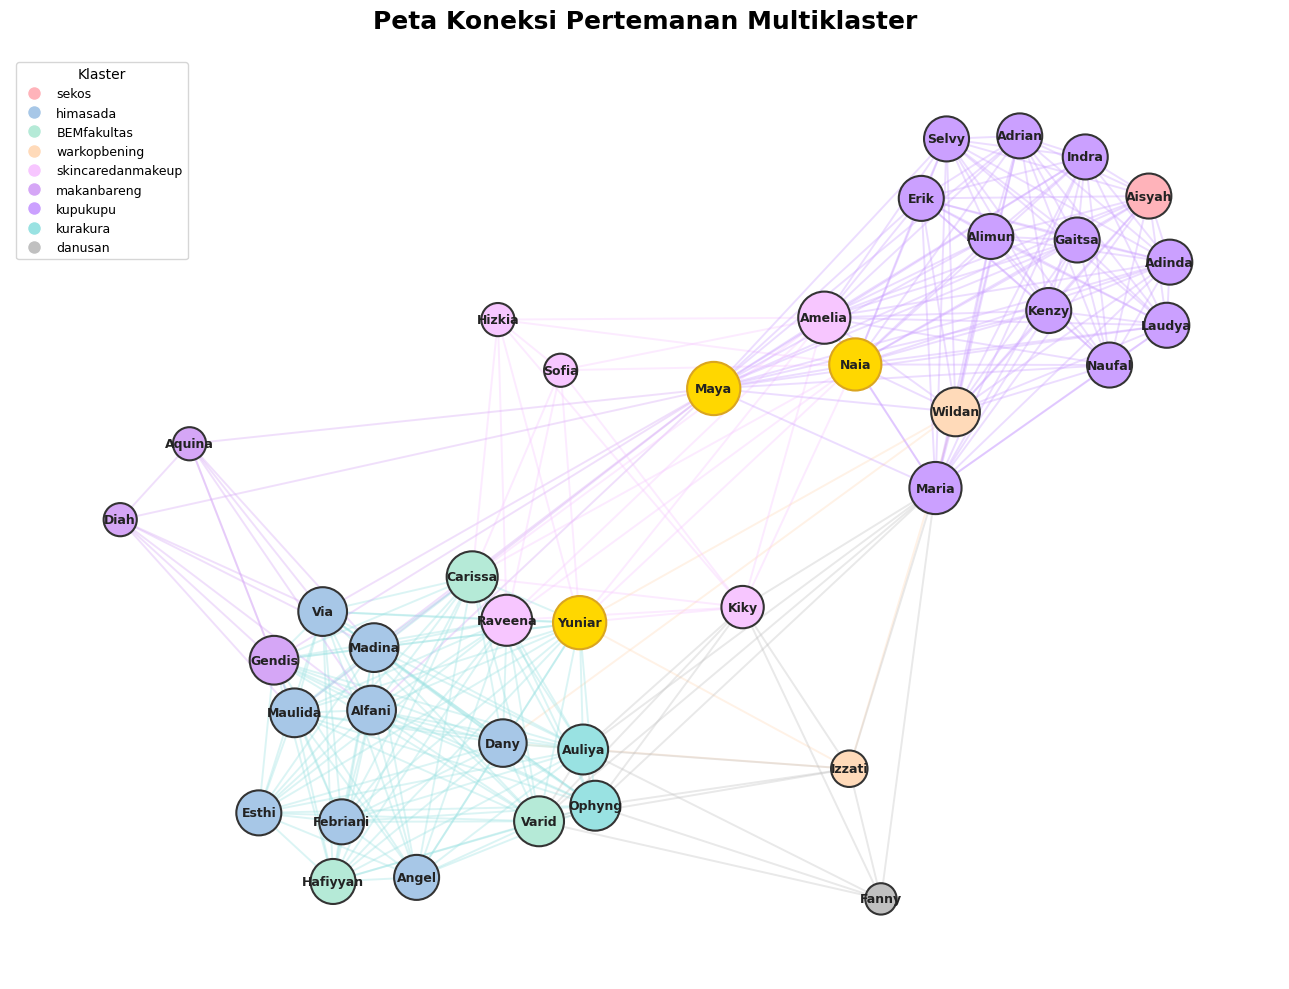

In [56]:

# --- Buat Graph ---
G = nx.Graph()

def add_cluster(G, members, color):
    for a, b in itertools.combinations(members, 2):
        G.add_edge(a, b, color=color)

for c_name, members in clusters.items():
    add_cluster(G, members, cluster_colors[c_name])

# --- Hitung degree ---
degree_dict = dict(G.degree())
top3 = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:3]
highlight_nodes = [n for n, _ in top3]

# --- Tentukan warna bubble berdasarkan klaster dominan ---
node_cluster = {}
for name in G.nodes():
    member_of = [c for c, members in clusters.items() if name in members]
    # ambil klaster dengan warna pertama (atau dominan)
    node_cluster[name] = cluster_colors[member_of[0]] if member_of else "#FFFFFF"

# --- Layout & style ---
pos = nx.spring_layout(G, seed=42, k=0.55, iterations=200)
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
node_sizes = [150 + degree_dict[n]*60 for n in G.nodes()]

node_colors = [
    "#FFD700" if n in highlight_nodes else node_cluster[n]
    for n in G.nodes()
]
node_outline = [
    "#DAA520" if n in highlight_nodes else "#333"
    for n in G.nodes()
]

# --- Gambar ---
plt.figure(figsize=(13, 10))
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.4, alpha=0.35)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, edgecolors=node_outline,
                       linewidths=1.5, node_size=node_sizes)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', font_color="#222")

# --- Judul ---
plt.title("Peta Koneksi Pertemanan Multiklaster", fontsize=18, fontweight='bold', pad=20)

# --- Legend ---
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=name)
    for name, color in cluster_colors.items()
]
plt.legend(handles=legend_elements, title="Klaster", loc='upper left', fontsize=9, title_fontsize=10, frameon=True)

plt.axis("off")
plt.tight_layout()
plt.show()


Pada hasil visualisasi diatas dapat dilihat bahwa jaringan hubungan antar individu terbagi ke dalam beberapa klaster utama yang dibedakan berdasarkan warna node. Untuk keterangan warna node merah menandakan bahwa nama-nama yang memiliki warna merah adalah sekos, warna node biru artinya nama-nama mahasiswa tersebut merupakan anggota himasada. Untuk warna node hijau merupakan nama-nama mahasiswa anggota BEM, warna node oren menandakan bahwa nama-nama mahasiswa tersebut sering mengunjungi warkop bening, warna node pink adalah skincare dan make up yang dimana nama mahasiswa dengan warna ini menunjukkan bahwa mahasiswa tersebut memiliki merk make up dan skincare yang sama. Kemudian untuk warna node lavender merupakan makan bareng yang dimana nama mahasiswa tersebut sering makan bareng dalam waktu istirahat makan, begitupun dengan warna node ungu tua yakni kupu-kupu atau kuliah pulang-kuliah pulang, yang artinya nama mahasiwa yang memiliki warna node tersebut merupakan mahasiswa yang sering pulang atau tidak ada kegiatas di kampus selain kelas. Untuk warna node hijau, merupakan nama-nama mahasiswa yang kura-kura atau kuliah rapat-kuliah rapat. Yang terakhir ada warna node abu-abu, artinya nama mahasiwa tersebut sering menjual danusan.

Pada hasil analisis, individu dalam jaringan membentuk berbagai kelompok dengan tingkat hubungan yang berbeda. Ada kelompok yang saling berhubungan sangat dekat dan erat yang artinya menunjukkan interaksi yang kuat antar anggotanya. Sementara itu, kelompok lain terlihat lebih tersebar artinya interaksi yang tidak terlalu intens di antara anggotanya. Beberapa orang memiliki peran penting di tengah kelompok-kelompok itu seperti Maya, Yuniar, dan Maria terlihat memiliki banyak koneksi antar kelompok, yang menunjukkan mereka membantu menghubungkan komunikasi dan memperluas hubungan antar komunitas.

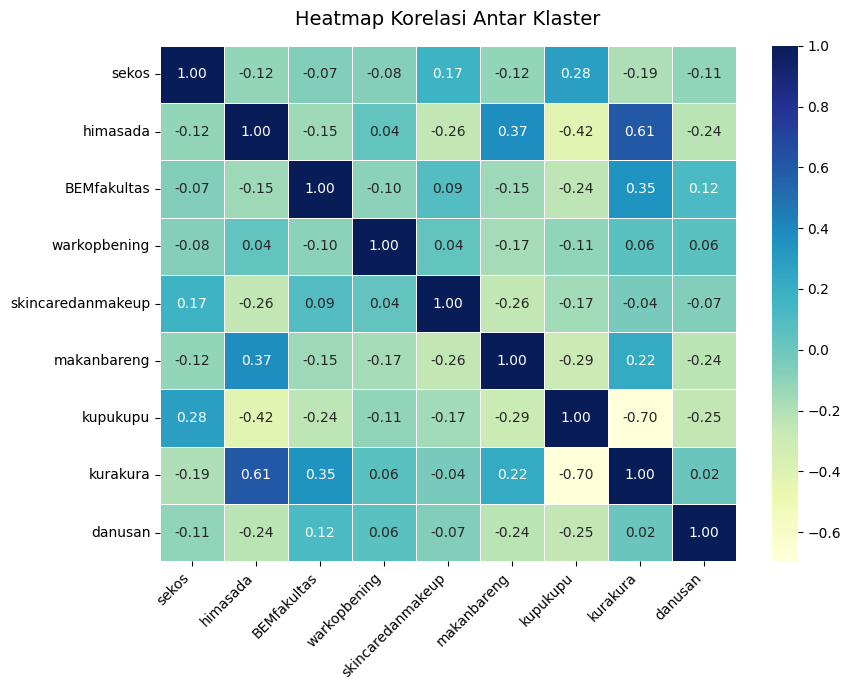

In [57]:

# --- Buat dataframe keanggotaan (1 = anggota, 0 = bukan) ---
all_people = sorted(set(sum(clusters.values(), [])))
df = pd.DataFrame(0, index=all_people, columns=clusters.keys())

for c, members in clusters.items():
    df.loc[members, c] = 1

# --- Hitung korelasi antar klaster ---
corr = df.corr(method='pearson')

# --- Plot heatmap ---
plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")
plt.title("Heatmap Korelasi Antar Klaster", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Heatmap diatas digunakan untuk menunjukkan hubungan antar kluster berdasarkan kesamaan setiap anggotanya dengan nilai beriksar -1 hingga 1. Nilai yang mendekati 1 menunjukkan terdapat kesamaan yang tinggi antar klaster, sedangkan nilai yang mendekati -1 menunjukkan hubungan yang hampir tidak memiliki kesamaan.

Pada hasil visualisasi heatmap, korelasi tertinggi terdapat antar klaster himasada dan kura-kura dengan nilai sebesar 0,61 yang artinya kedua klaster ini memiliki beberapa anggota yang saling beririsan atau berinteraksi cukup kuat karena beberapa anggota hima fasenya kuliah rapat-kuliah rapat. Korelasi positif kedua adalah klaster himasada dan makan bareng dengan nilai sebesar 0,37 artinya bahwa beberapa anggota hima sering makan bareng saat rapat. Kemudian, korelasi positif ketiga terdapat pada klaster bem dan juga kura-kura artinya bahwa anggota bem juga fase kehidupan di kampus adalah kuliah rapat. Sementara itu, beberapa nilai korelasi negatif lemah diantaranya adalah -0,42 dengan klaster himasada dan kupu-kupu, yang menunjukan bahwa beberapa anggota himasada hampir tidak memiliki fase kuliah pulang. Kemudian untuk korelasi negatif kuat ada pada klaster kupu-kupu dan kura-kura yang artiny kedua klaster ini cenderung memiliki anggota yang berbeda sifat maupun fase kuliah.

/tmp/ipython-input-3478384465.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_degree.keys()), y=list(sorted_degree.values()), palette="viridis")


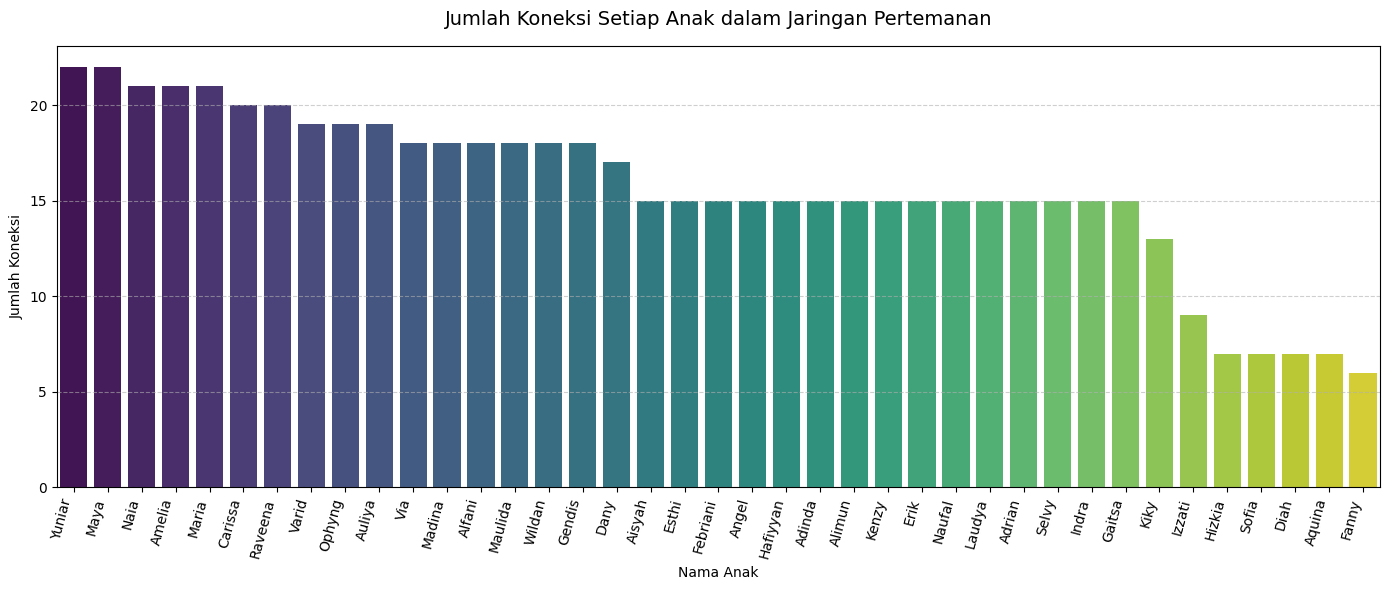

3 Anak dengan Koneksi Terbanyak:
#1 Yuniar — 22 koneksi
#2 Maya — 22 koneksi
#3 Naia — 21 koneksi


In [58]:
# --- Buat graf jaringan ---
G = nx.Graph()
for members in clusters.values():
    for i in range(len(members)):
        for j in range(i + 1, len(members)):
            G.add_edge(members[i], members[j])

# --- Hitung jumlah koneksi (degree) tiap anak ---
degree_dict = dict(G.degree())

# --- Urutkan dari koneksi terbanyak ---
sorted_degree = dict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))

# --- Plot histogram batang per anak ---
plt.figure(figsize=(14, 6))
sns.barplot(x=list(sorted_degree.keys()), y=list(sorted_degree.values()), palette="viridis")
plt.xticks(rotation=75, ha='right')
plt.title("Jumlah Koneksi Setiap Anak dalam Jaringan Pertemanan", fontsize=14, pad=15)
plt.xlabel("Nama Anak")
plt.ylabel("Jumlah Koneksi")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Cetak top 5 koneksi tertinggi ---
top5 = list(sorted_degree.items())[:3]
print("3 Anak dengan Koneksi Terbanyak:")
for i, (nama, koneksi) in enumerate(top5, 1):
    print(f"#{i} {nama} — {koneksi} koneksi")

Grafik ini menunjukkan berapa banyak teman yang dimiliki oleh setiap orang dalam jaringan pertemanan. Dari kiri ke kanan, terlihat bahwa Yuniar memiliki jumlah teman paling banyak, yaitu 22 orang, diikuti oleh Maya dan Naia yang masing-masing juga memiliki 22 teman. Hal ini menunjukkan bahwa ketiga orang tersebut menjadi pusat dalam jaringan karena memiliki banyak hubungan dengan orang lain. Selanjutnya, Carissa, Amelia, dan Maria juga memiliki jumlah teman yang cukup banyak, yaitu antara 19 hingga 20 orang, menunjukkan bahwa mereka masih aktif dalam berinteraksi dengan lingkungan sosialnya.

Di bagian tengah grafik, Via, Alfani, Madinba, Maulida memiliki jumlah teman yang sedang, antara 15 sampai 17 orang, yang menunjukkan bahwa mereka memiliki interaksi sosial yang stabil, meskipun tidak sebanyak orang-orang di bagian depan grafik.
Di bagian kanan grafik, terdapat individu dengan jumlah teman paling sedikit Fanny, Aquina, Diah, dan Sofia masing-masing memiliki antara 6 hingga 8 teman, menunjukkan bahwa mereka cenderung memiliki lingkaran pertemanan yang lebih kecil atau kurang aktif dalam membangun hubungan sosial dibandingkan dengan orang lain.

In [59]:
# --- Analisis 2: Pasangan paling jauh koneksinya ---
# hanya jika graf terhubung
if nx.is_connected(G):
    length_dict = dict(nx.all_pairs_shortest_path_length(G))
    max_dist = 0
    farthest_pair = None
    for a in length_dict:
        for b, dist in length_dict[a].items():
            if dist > max_dist:
                max_dist = dist
                farthest_pair = (a, b)
    print(f"\n2) Pasangan paling jauh: {farthest_pair} (jarak {max_dist} edge)")
else:
    print("\n2) Graph tidak terhubung, jadi ada node yang terpisah.")

# --- Analisis 3a: Bridge person (betweenness centrality) ---
bc = nx.betweenness_centrality(G)
max_bc = max(bc.values())
bridge_persons = [p for p, v in bc.items() if v == max_bc]
print("\n3a) Bridge person (betweenness tertinggi):", bridge_persons, f"(nilai={max_bc:.3f})")

# --- Analisis 3b: Bridge person dengan koneksi paling sedikit ---
bridge_with_fewest_links = min(bridge_persons, key=lambda x: degree_dict[x])
print("3b) Bridge person dengan koneksi paling sedikit:", bridge_with_fewest_links)


2) Pasangan paling jauh: ('Aisyah', 'Febriani') (jarak 3 edge)

3a) Bridge person (betweenness tertinggi): ['Maya'] (nilai=0.149)
3b) Bridge person dengan koneksi paling sedikit: Maya


Hasil menunjukkan bahwa pasangan individu dengan jarak koneksi terjauh dalam jaringan adalah Aisyah dan Febriani, dengan jarak sebanyak 3 edge. Artinya, untuk bisa saling terhubung, keduanya membutuhkan tiga hubungan atau tiga langkah koneksi. Hal ini menunjukkan bahwa kedua orang tersebut berada di posisi yang cukup jauh dalam struktur jaringan dan tidak termasuk dalam lingkaran sosial yang sama secara langsung. Dengan kata lain, mereka berdua berada di area jaringan yang kurang saling terhubung dan memiliki sedikit jalur koneksi yang sama.

Pada hasil perhitungan betweenness centrality menunjukkan bahwa individu dengan nilai tertinggi adalah Maya, dengan nilai 0.149.
Nilai ini mengindikasikan bahwa Maya berperan penting sebagai penghubung antara beberapa kelompok dalam jaringan. Kemudian dari hasil analisis bridge person dengan koneksi paling sedikit yakni Maya, karena Maya hanya menjadi penghubung antar kelompok namun sedikit memiliki koneksi.

In [60]:
# --- Buat graf jaringan ---
G = nx.Graph()
for members in clusters.values():
    for i in range(len(members)):
        for j in range(i + 1, len(members)):
            G.add_edge(members[i], members[j])

# --- Hitung betweenness centrality (ternormalisasi) ---
betweenness = nx.betweenness_centrality(G, normalized=True)

# --- Ubah jadi DataFrame agar mudah dibandingkan ---
df_bet = pd.DataFrame(list(betweenness.items()), columns=["Nama", "Betweenness"])
df_bet = df_bet.sort_values(by="Betweenness", ascending=False).reset_index(drop=True)

# --- Cetak hasilnya ---
print(df_bet.head(5))

     Nama  Betweenness
0    Maya     0.149491
1   Maria     0.096955
2    Naia     0.059907
3  Amelia     0.059907
4  Yuniar     0.051483


Kode diatas digunakan untuk menghitung betweenness tertinggi dengan 5 anggota. Maya memiliki nilai betweenness centrality yang tertinggi, yaitu 0,149491. Ini berarti bahwa Maya berperan sebagai orang yang menghubungkan atau menjadi jembatan dalam jaringan. Ia sering kali menjadi jalur yang menghubungkan antara individu atau kelompok yang tidak langsung saling terhubung. Keberadaan Maya sangat penting dalam menjaga kelancaran komunikasi atau aliran informasi antar kelompok. Maria, Naila, dan Amelia memiliki nilai betweenness yang lebih rendah dibandingkan Maya, tetapi tetap cukup signifikan. Mereka juga berperan dalam menghubungkan beberapa anggota, meskipun perannya tidak sekuat Maya. Yuniar memiliki nilai betweenness yang paling rendah, yaitu 0,051483. Hal ini menunjukkan bahwa Yuniar tidak terlalu berperan sebagai perantara dalam komunikasi antar anggota jaringan.

/tmp/ipython-input-83918812.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


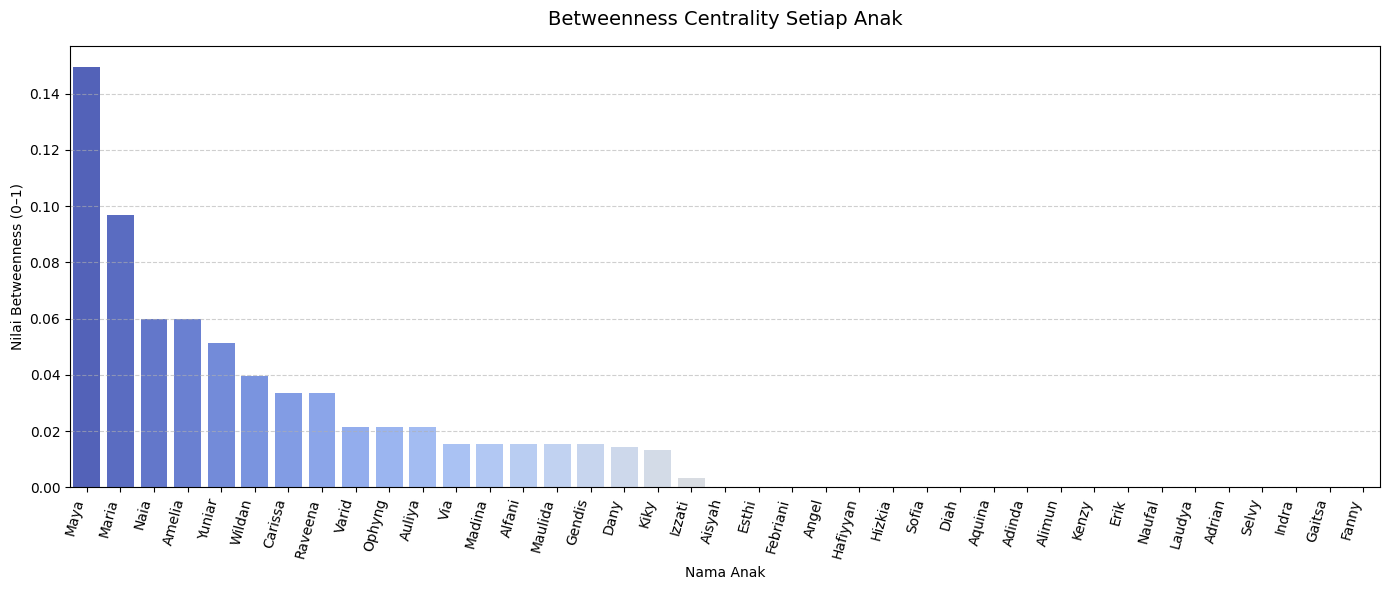

In [61]:
# --- Hitung betweenness centrality (ternormalisasi) ---
betweenness = nx.betweenness_centrality(G, normalized=True)

# --- Urutkan berdasarkan nilai ---
sorted_bet = dict(sorted(betweenness.items(), key=lambda x: x[1], reverse=True))

# --- Plot histogram batang per orang ---
plt.figure(figsize=(14,6))
sns.barplot(
    x=list(sorted_bet.keys()),
    y=list(sorted_bet.values()),
    palette="coolwarm"
)
plt.xticks(rotation=75, ha='right')
plt.title("Betweenness Centrality Setiap Anak", fontsize=14, pad=15)
plt.xlabel("Nama Anak")
plt.ylabel("Nilai Betweenness (0–1)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Berdasarkan grafik betweenness centrality, Maya memiliki nilai tertinggi, sehingga berperan sebagai penghubung utama antar anak dalam jaringan. Maria, Naila, Amelia, dan Yuniar juga berperan sebagai penghubung, meskipun peran mereka lebih kecil. Sementara itu, sebagian besar anak lainnya memiliki nilai betweenness yang rendah, menunjukkan bahwa mereka hanya berinteraksi dalam kelompok kecilnya sendiri dan tidak berfungsi sebagai penghubung antar kelompok. Hal ini menunjukkan bahwa struktur jaringan dipengaruhi oleh beberapa anak yang menjadi pusat keterhubungan antar bagian dalam jaringan.